In [1]:
from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np
import matplotlib.pyplot as plt
import cv2
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

### Draw landmarks in the image


In [3]:
def draw_landmarks_on_image(rgb_image, detection_result):
  pose_landmarks_list = detection_result.pose_landmarks
  annotated_image = np.copy(rgb_image)

  # Loop through the detected poses to visualize.
  for idx in range(len(pose_landmarks_list)):
    pose_landmarks = pose_landmarks_list[idx]

    # Draw the pose landmarks.
    pose_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    pose_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in pose_landmarks
    ])
    solutions.drawing_utils.draw_landmarks(
      annotated_image,
      pose_landmarks_proto,
      solutions.pose.POSE_CONNECTIONS,
      solutions.drawing_styles.get_default_pose_landmarks_style())
  return annotated_image

### Get only the pose landmarks 

In [4]:
def solo_landmarks_mask(image, landmarks, connections=None):
    # Create a black image with the same size as the original
    mask = np.zeros_like(image)

    # Draw red dots on the mask image
    for landmark in landmarks.landmark:
        x = min(int(landmark.x * image.shape[1]), image.shape[1] - 1)
        y = min(int(landmark.y * image.shape[0]), image.shape[0] - 1)
        cv2.circle(mask, (x, y), 2, (0, 0, 255), -1)

    # Draw lines on the mask image
    if connections:
        for connection in connections:
            start_idx = connection[0]
            end_idx = connection[1]

            start_point = (int(landmarks.landmark[start_idx].x * image.shape[1]),
                           int(landmarks.landmark[start_idx].y * image.shape[0]))
            end_point = (int(landmarks.landmark[end_idx].x * image.shape[1]),
                         int(landmarks.landmark[end_idx].y * image.shape[0]))

            cv2.line(mask, start_point, end_point, (255, 255, 255), 2)

    return mask
    

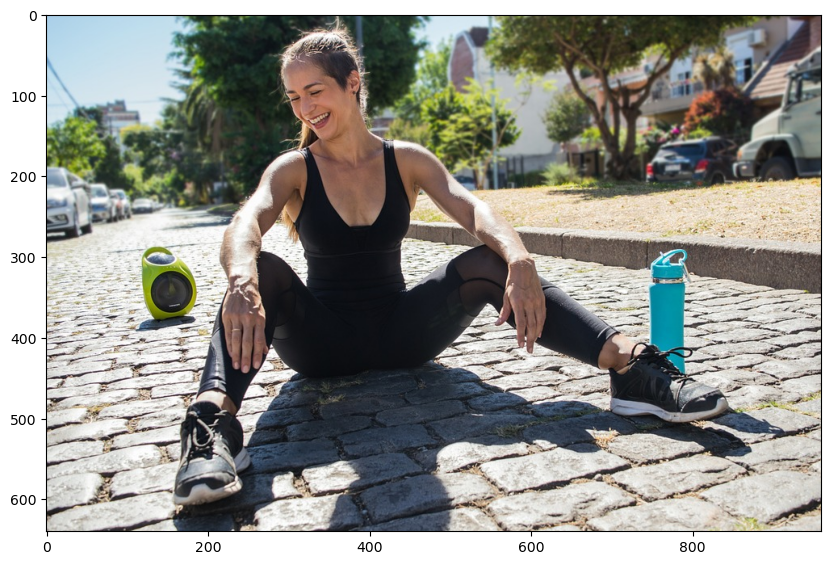

In [6]:
# Load image from file
image = cv2.imread('images/img1.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Plot
plt.figure(figsize=(10, 10))
plt.imshow(image)

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


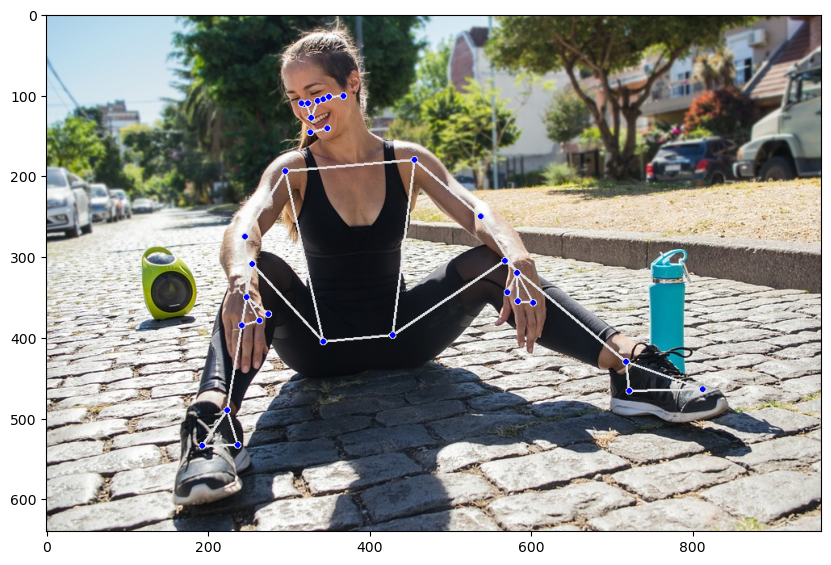

In [7]:
# STEP 2: Create a PoseLandmarker object.
mp_pose = mp.solutions.pose

# STEP 4: Detect pose landmarks from the input image.
with mp_pose.Pose() as pose_detector:
    detection_result = pose_detector.process(image)

# STEP 5: Process the detection result. In this case, visualize it.
annotated_image = image.copy()
if detection_result.pose_landmarks:
    mp.solutions.drawing_utils.draw_landmarks(
        annotated_image, detection_result.pose_landmarks, mp_pose.POSE_CONNECTIONS)

# Plot the landmarks mask
plt.figure(figsize=(10, 10))
plt.imshow(annotated_image)

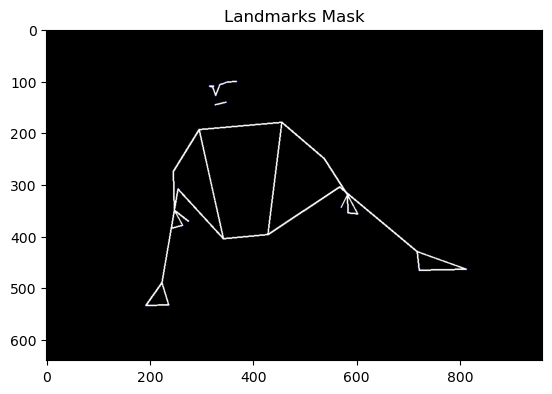

In [8]:
if detection_result.pose_landmarks:
    mask = solo_landmarks_mask(image, detection_result.pose_landmarks, mp_pose.POSE_CONNECTIONS)

# Plot the landmarks mask
plt.imshow(mask)
plt.title("Landmarks Mask")
plt.show()